# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [465]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import scipy.stats as st
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [466]:
portefeuille = pd.read_csv('portefeuille_actifs+(3).csv')

In [467]:
#On importe les données dans un dataframe
historique = pd.read_csv('historique_immobilier_paris_2017_2021_vdef2.csv')
historique.head()


date_mutation  valeur_fonciere  adresse_numero  \
0  2017-01-03 00:00:00     5.505597e+05               8   
1  2017-01-12 00:00:00     1.576492e+06              32   
2  2017-01-10 00:00:00     6.577574e+05              52   
3  2017-01-10 00:00:00     2.500868e+05              64   
4  2017-01-13 00:00:00     1.762667e+05              25   

                 adresse_nom_voie  code_postal               nom_commune  \
0  RUE DES COUTURES SAINT GERVAIS        75003   Paris 3e Arrondissement   
1                      AV MARCEAU        75008   Paris 8e Arrondissement   
2    RUE DU FAUBOURG SAINT HONORE        75008   Paris 8e Arrondissement   
3                 RUE DU VERTBOIS        75003   Paris 3e Arrondissement   
4  RUE DES LAVANDIERES STE OPPORT        75001  Paris 1er Arrondissement   

   code_type_local   type_local  surface_reelle  
0                2  Appartement              50  
1                2  Appartement             163  
2                2  Appartement              66  
3                2  Appartement              22  
4                2  Appartement              15

In [468]:
historique.info

<bound method DataFrame.info of              date_mutation  valeur_fonciere  adresse_numero  \
0      2017-01-03 00:00:00     5.505597e+05               8   
1      2017-01-12 00:00:00     1.576492e+06              32   
2      2017-01-10 00:00:00     6.577574e+05              52   
3      2017-01-10 00:00:00     2.500868e+05              64   
4      2017-01-13 00:00:00     1.762667e+05              25   
...                    ...              ...             ...   
26191  2021-02-25 00:00:00     4.712239e+05              16   
26192  2021-02-17 00:00:00     1.982330e+06              23   
26193  2021-03-08 00:00:00     3.124359e+05               5   
26194  2021-03-11 00:00:00     1.562234e+05              15   
26195  2021-03-19 00:00:00     3.694294e+05             190   

                     adresse_nom_voie  code_postal               nom_commune  \
0      RUE DES COUTURES SAINT GERVAIS        75003   Paris 3e Arrondissement   
1                          AV MARCEAU        75008 

In [469]:
historique.head(5)


date_mutation  valeur_fonciere  adresse_numero  \
0  2017-01-03 00:00:00     5.505597e+05               8   
1  2017-01-12 00:00:00     1.576492e+06              32   
2  2017-01-10 00:00:00     6.577574e+05              52   
3  2017-01-10 00:00:00     2.500868e+05              64   
4  2017-01-13 00:00:00     1.762667e+05              25   

                 adresse_nom_voie  code_postal               nom_commune  \
0  RUE DES COUTURES SAINT GERVAIS        75003   Paris 3e Arrondissement   
1                      AV MARCEAU        75008   Paris 8e Arrondissement   
2    RUE DU FAUBOURG SAINT HONORE        75008   Paris 8e Arrondissement   
3                 RUE DU VERTBOIS        75003   Paris 3e Arrondissement   
4  RUE DES LAVANDIERES STE OPPORT        75001  Paris 1er Arrondissement   

   code_type_local   type_local  surface_reelle  
0                2  Appartement              50  
1                2  Appartement             163  
2                2  Appartement              66  
3                2  Appartement              22  
4                2  Appartement              15

In [470]:
historique.info

<bound method DataFrame.info of              date_mutation  valeur_fonciere  adresse_numero  \
0      2017-01-03 00:00:00     5.505597e+05               8   
1      2017-01-12 00:00:00     1.576492e+06              32   
2      2017-01-10 00:00:00     6.577574e+05              52   
3      2017-01-10 00:00:00     2.500868e+05              64   
4      2017-01-13 00:00:00     1.762667e+05              25   
...                    ...              ...             ...   
26191  2021-02-25 00:00:00     4.712239e+05              16   
26192  2021-02-17 00:00:00     1.982330e+06              23   
26193  2021-03-08 00:00:00     3.124359e+05               5   
26194  2021-03-11 00:00:00     1.562234e+05              15   
26195  2021-03-19 00:00:00     3.694294e+05             190   

                     adresse_nom_voie  code_postal               nom_commune  \
0      RUE DES COUTURES SAINT GERVAIS        75003   Paris 3e Arrondissement   
1                          AV MARCEAU        75008 

In [471]:
historique.isnull().sum()

date_mutation       0
valeur_fonciere     0
adresse_numero      0
adresse_nom_voie    0
code_postal         0
nom_commune         0
code_type_local     0
type_local          0
surface_reelle      0
dtype: int64

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [473]:
#On vérifie que le type des données attribué par pandas est cohérent
historique.dtypes


date_mutation        object
valeur_fonciere     float64
adresse_numero        int64
adresse_nom_voie     object
code_postal           int64
nom_commune          object
code_type_local       int64
type_local           object
surface_reelle        int64
dtype: object

In [474]:
historique['date_mutation'] = pd.to_datetime(historique['date_mutation'])


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [476]:
historique[['code_type_local','type_local']].drop_duplicates()

code_type_local                                type_local
0                 2                               Appartement
18                4  Local industriel. commercial ou assimilé

In [477]:
historique.type_local.unique()

array(['Appartement', 'Local industriel. commercial ou assimilé'],
      dtype=object)

In [478]:
print('La liste des différents types de biens immobiliers que nous avons dans les données est : ' + str(portefeuille.type_local.unique()) + str(portefeuille.code_type_local.unique()))
                                                                                                       

La liste des différents types de biens immobiliers que nous avons dans les données est : ['Appartement' 'Local industriel. commercial ou assimilé'][2 4]


In [479]:
print(historique.type_local.value_counts(),historique.code_type_local.value_counts())

type_local
Appartement                                 24353
Local industriel. commercial ou assimilé     1843
Name: count, dtype: int64 code_type_local
2    24353
4     1843
Name: count, dtype: int64


### 3. Nombre de transactions

In [481]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('Le nombre de transactions dans les données est de ' + str(historique.shape[0]))
print('Le nombre de transactions pour les appartements dans les données est : ' + str(historique[historique['type_local'] == 'Appartement'].shape[0]))
print('le nombre de transactions pour les locaux commerciaux dans les données est ' + str(historique[historique['type_local'] == 'Local industriel. commercial ou assimilé'].shape[0]))

Le nombre de transactions dans les données est de 26196
Le nombre de transactions pour les appartements dans les données est : 24353
le nombre de transactions pour les locaux commerciaux dans les données est 1843


In [482]:
historique.groupby(['code_postal', 'type_local']).size()

code_postal  type_local                              
75001        Appartement                                  409
             Local industriel. commercial ou assimilé      59
75002        Appartement                                  666
             Local industriel. commercial ou assimilé      67
75003        Appartement                                  784
             Local industriel. commercial ou assimilé      93
75004        Appartement                                  548
             Local industriel. commercial ou assimilé      42
75005        Appartement                                  829
             Local industriel. commercial ou assimilé      81
75006        Appartement                                  709
             Local industriel. commercial ou assimilé      73
75007        Appartement                                  607
             Local industriel. commercial ou assimilé      60
75008        Appartement                                  628
             Loc

### 4. interval de l'historique des données

In [484]:
#On vérifie également la plage de l'historique disponible
print('La première date de transaction dans les données est le ' + str(historique['date_mutation'].min()))
print('La dernière date de transaction dans les données est le ' + str(historique['date_mutation'].max()))

La première date de transaction dans les données est le 2017-01-02 00:00:00
La dernière date de transaction dans les données est le 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [487]:
# Calcul de la colonne
historique['prix_m2'] = historique['valeur_fonciere'] / historique['surface_reelle']
historique['prix_m2'].mean()

10325.993288849848

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [490]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps


In [491]:

historique = historique.drop(columns=['adresse_numero', 'adresse_nom_voie'])

In [492]:
historique['annee'] = historique['date_mutation'].dt.year
appartement = historique[historique['type_local'] == 'Appartement'].copy()

appartement.head(5)

date_mutation  valeur_fonciere  code_postal               nom_commune  \
0    2017-01-03     5.505597e+05        75003   Paris 3e Arrondissement   
1    2017-01-12     1.576492e+06        75008   Paris 8e Arrondissement   
2    2017-01-10     6.577574e+05        75008   Paris 8e Arrondissement   
3    2017-01-10     2.500868e+05        75003   Paris 3e Arrondissement   
4    2017-01-13     1.762667e+05        75001  Paris 1er Arrondissement   

   code_type_local   type_local  surface_reelle       prix_m2  annee  
0                2  Appartement              50  11011.193562   2017  
1                2  Appartement             163   9671.732877   2017  
2                2  Appartement              66   9966.020548   2017  
3                2  Appartement              22  11367.582877   2017  
4                2  Appartement              15  11751.113833   2017

In [493]:
loccomA = historique[historique['type_local'] == 'Local industriel. commercial ou assimilé'].copy()
loccomA

date_mutation  valeur_fonciere  code_postal               nom_commune  \
18       2017-02-01     3.113277e+06        75003   Paris 3e Arrondissement   
29       2017-02-17     1.164375e+06        75003   Paris 3e Arrondissement   
34       2017-02-20     3.802522e+05        75003   Paris 3e Arrondissement   
91       2017-03-09     3.623842e+05        75001  Paris 1er Arrondissement   
109      2017-03-29     3.159072e+05        75003   Paris 3e Arrondissement   
...             ...              ...          ...                       ...   
26149    2021-01-13     1.903438e+05        75002   Paris 2e Arrondissement   
26164    2021-01-26     4.487582e+05        75002   Paris 2e Arrondissement   
26166    2021-01-13     6.409217e+05        75002   Paris 2e Arrondissement   
26190    2021-02-26     5.131939e+05        75004   Paris 4e Arrondissement   
26192    2021-02-17     1.982330e+06        75002   Paris 2e Arrondissement   

       code_type_local                                type_local  \
18                   4  Local industriel. commercial ou assimilé   
29                   4  Local industriel. commercial ou assimilé   
34                   4  Local industriel. commercial ou assimilé   
91                   4  Local industriel. commercial ou assimilé   
109                  4  Local industriel. commercial ou assimilé   
...                ...                                       ...   
26149                4  Local industriel. commercial ou assimilé   
26164                4  Local industriel. commercial ou assimilé   
26166                4  Local industriel. commercial ou assimilé   
26190                4  Local industriel. commercial ou assimilé   
26192                4  Local industriel. commercial ou assimilé   

       surface_reelle       prix_m2  annee  
18                250  12453.109192   2017  
29                 95  12256.581684   2017  
34                 31  12266.199603   2017  
91                 29  12496.006028   2017  
109                25  12636.289028   2017  
...               ...           ...    ...  
26149              15  12689.584933   2021  
26164              35  12821.664040   2021  
26166              49  13080.033698   2021  
26190              37  13870.106138   2021  
26192             150  13215.536367   2021  

[1843 rows x 9 columns]

In [494]:
appartement.info

<bound method DataFrame.info of       date_mutation  valeur_fonciere  code_postal               nom_commune  \
0        2017-01-03     5.505597e+05        75003   Paris 3e Arrondissement   
1        2017-01-12     1.576492e+06        75008   Paris 8e Arrondissement   
2        2017-01-10     6.577574e+05        75008   Paris 8e Arrondissement   
3        2017-01-10     2.500868e+05        75003   Paris 3e Arrondissement   
4        2017-01-13     1.762667e+05        75001  Paris 1er Arrondissement   
...             ...              ...          ...                       ...   
26189    2021-02-24     8.489150e+05        75004   Paris 4e Arrondissement   
26191    2021-02-25     4.712239e+05        75004   Paris 4e Arrondissement   
26193    2021-03-08     3.124359e+05        75002   Paris 2e Arrondissement   
26194    2021-03-11     1.562234e+05        75002   Paris 2e Arrondissement   
26195    2021-03-19     3.694294e+05        75002   Paris 2e Arrondissement   

       code_type_lo

In [495]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
appartementvis1 = appartement.groupby('annee').agg({
    'prix_m2': 'mean',
    'surface_reelle': 'mean'
}).reset_index()
appartementvis1

annee       prix_m2  surface_reelle
0   2017   9492.859195       44.627737
1   2018  10031.403432       44.271671
2   2019  10562.712581       43.361645
3   2020  10674.872650       42.900654
4   2021  10455.600126       43.479864

On constate sur la moyenne des prix de vente des appartements à Paris que celle-ci a augmenté de 2017 a 2020 puis a décliné.

Nous allons créer un graphique pour mieux le visualiser.

In [497]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(3,3))
plt.plot(['2017','2018','2019','2020','2021'],appartementvis1['prix_m2'])
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix m2')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Prix au M2 des appartements à Paris')
plt.show()

In [498]:
loccomAvis1 = loccomA.groupby('annee').agg({
    'prix_m2': 'mean',
    'surface_reelle': 'mean'
}).reset_index()
appartementvis1

annee       prix_m2  surface_reelle
0   2017   9492.859195       44.627737
1   2018  10031.403432       44.271671
2   2019  10562.712581       43.361645
3   2020  10674.872650       42.900654
4   2021  10455.600126       43.479864

In [499]:
plt.figure(figsize=(3,3))
plt.plot(['2017','2018','2019','2020','2021'],loccomAvis1['prix_m2'])
plt.xlabel('Années de vente ')
plt.ylabel('Prix m2')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Prix au M2 des locaux')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [502]:
#Liste des codes postaux dans nos données.
appartement.code_postal.unique()

array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002], dtype=int64)

In [503]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
loccomAvis2 = loccomA.groupby(['annee', 'code_postal']).agg({
    'prix_m2': 'mean',
   
}).reset_index()
    

loccomAvis2

annee  code_postal       prix_m2
0    2017        75001  12989.492721
1    2017        75002  11990.456042
2    2017        75003  12904.202341
3    2017        75004  13678.188564
4    2017        75005  12470.792205
..    ...          ...           ...
95   2021        75016  11922.098436
96   2021        75017  11342.258822
97   2021        75018  10652.894917
98   2021        75019   9737.619986
99   2021        75020   9963.548456

[100 rows x 3 columns]

In [504]:
appartementvis2 = appartement.groupby(['annee', 'code_postal']).agg({
    'prix_m2': 'mean',
   
}).reset_index()
    

appartementvis2

annee  code_postal       prix_m2
0    2017        75001  11762.706289
1    2017        75002  10920.126561
2    2017        75003  11679.818729
3    2017        75004  12407.227521
4    2017        75005  11306.752404
..    ...          ...           ...
95   2021        75016  10790.307817
96   2021        75017  10372.368746
97   2021        75018   9665.640630
98   2021        75019   8828.586057
99   2021        75020   9114.398249

[100 rows x 3 columns]

In [505]:
df_75001 = appartementvis2[appartementvis2['code_postal'] == 75001]

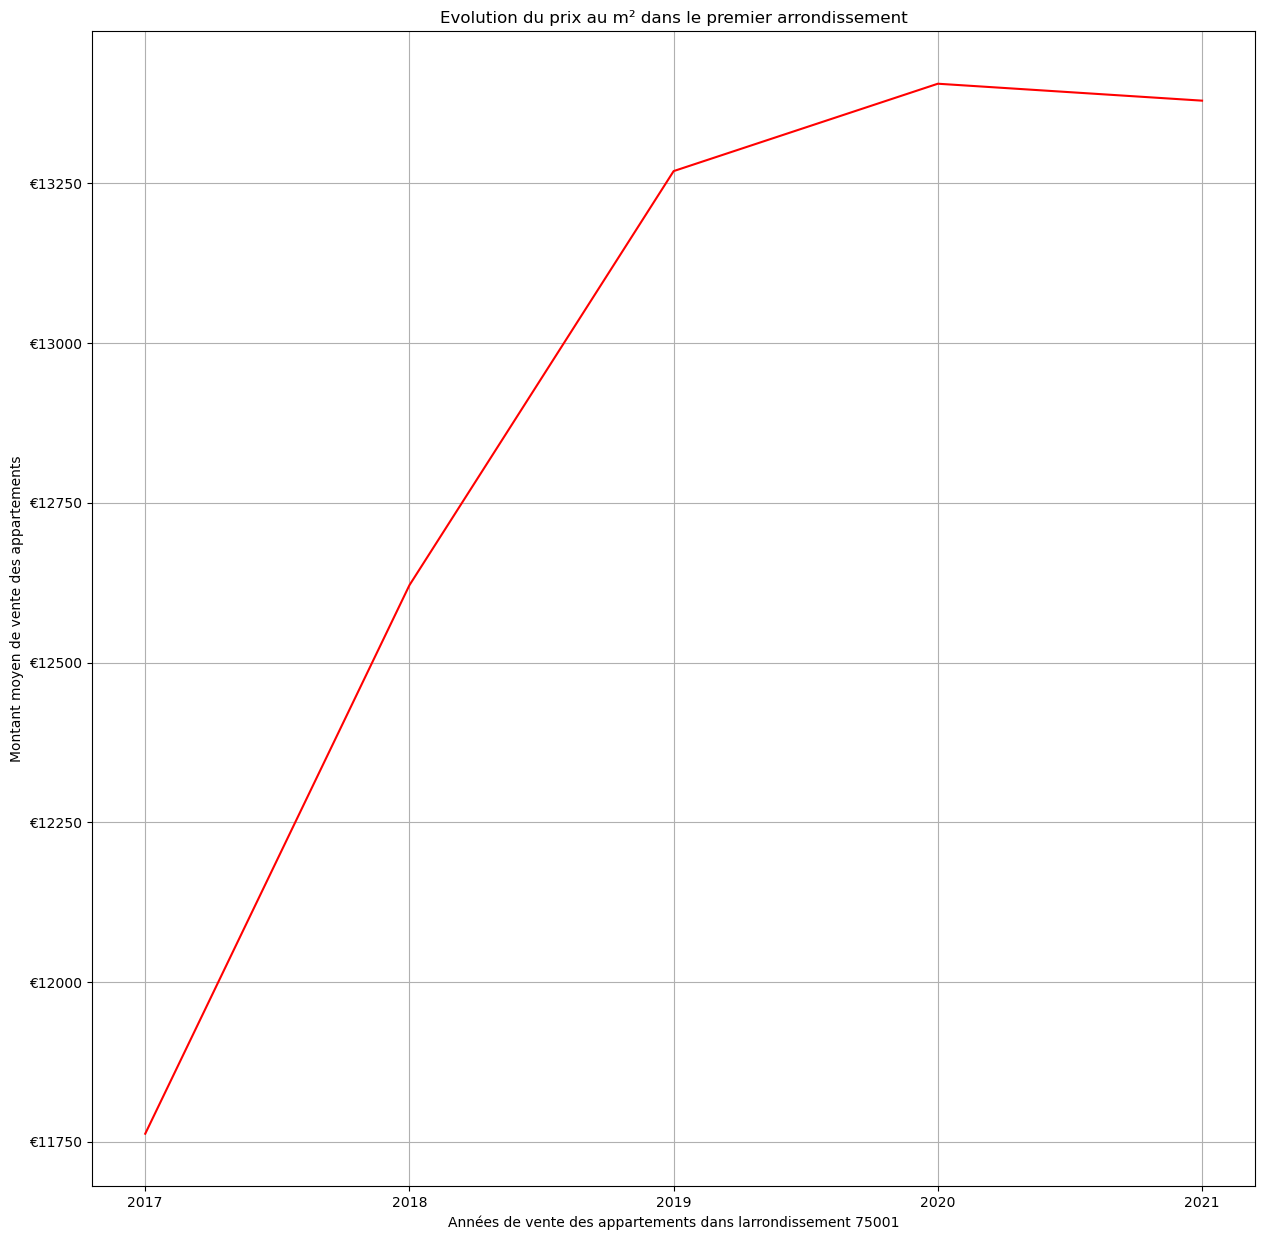

In [506]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
plt.plot(['2017','2018','2019','2020','2021'], df_75001['prix_m2'],color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

In [507]:
print(df_75001)

    annee  code_postal       prix_m2
0    2017        75001  11762.706289
20   2018        75001  12621.226146
40   2019        75001  13269.256149
60   2020        75001  13405.991820
80   2021        75001  13379.498578


Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

75007, 75017, 75012, 75020, 75014, 75015, 75019, 75013, 75004,
       75016, 75011, 75002, 75008, 75003, 75006, 75009, 75018, 75010,
       75005, 75001]

In [510]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
#Insérer les lignes à tracer ci-dessous
import matplotlib.pyplot as plt
import matplotlib

colors = matplotlib.colormaps.get_cmap('tab20').resampled(20)
plt.figure(figsize=(18, 10))


for i, cp in enumerate(range(75001, 75021)):
    data = appartementvis2[appartementvis2['code_postal'] == cp]
    if not data.empty:
        plt.plot(data['annee'], data['prix_m2'], label=str(cp), color=colors(i))

plt.xlabel("Années")
plt.ylabel("Prix moyen au m² (€)")
plt.title("Évolution du prix au m² dans les 20 arrondissements de Paris")
plt.grid(True)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('€%d'))
plt.tight_layout()
plt.show()

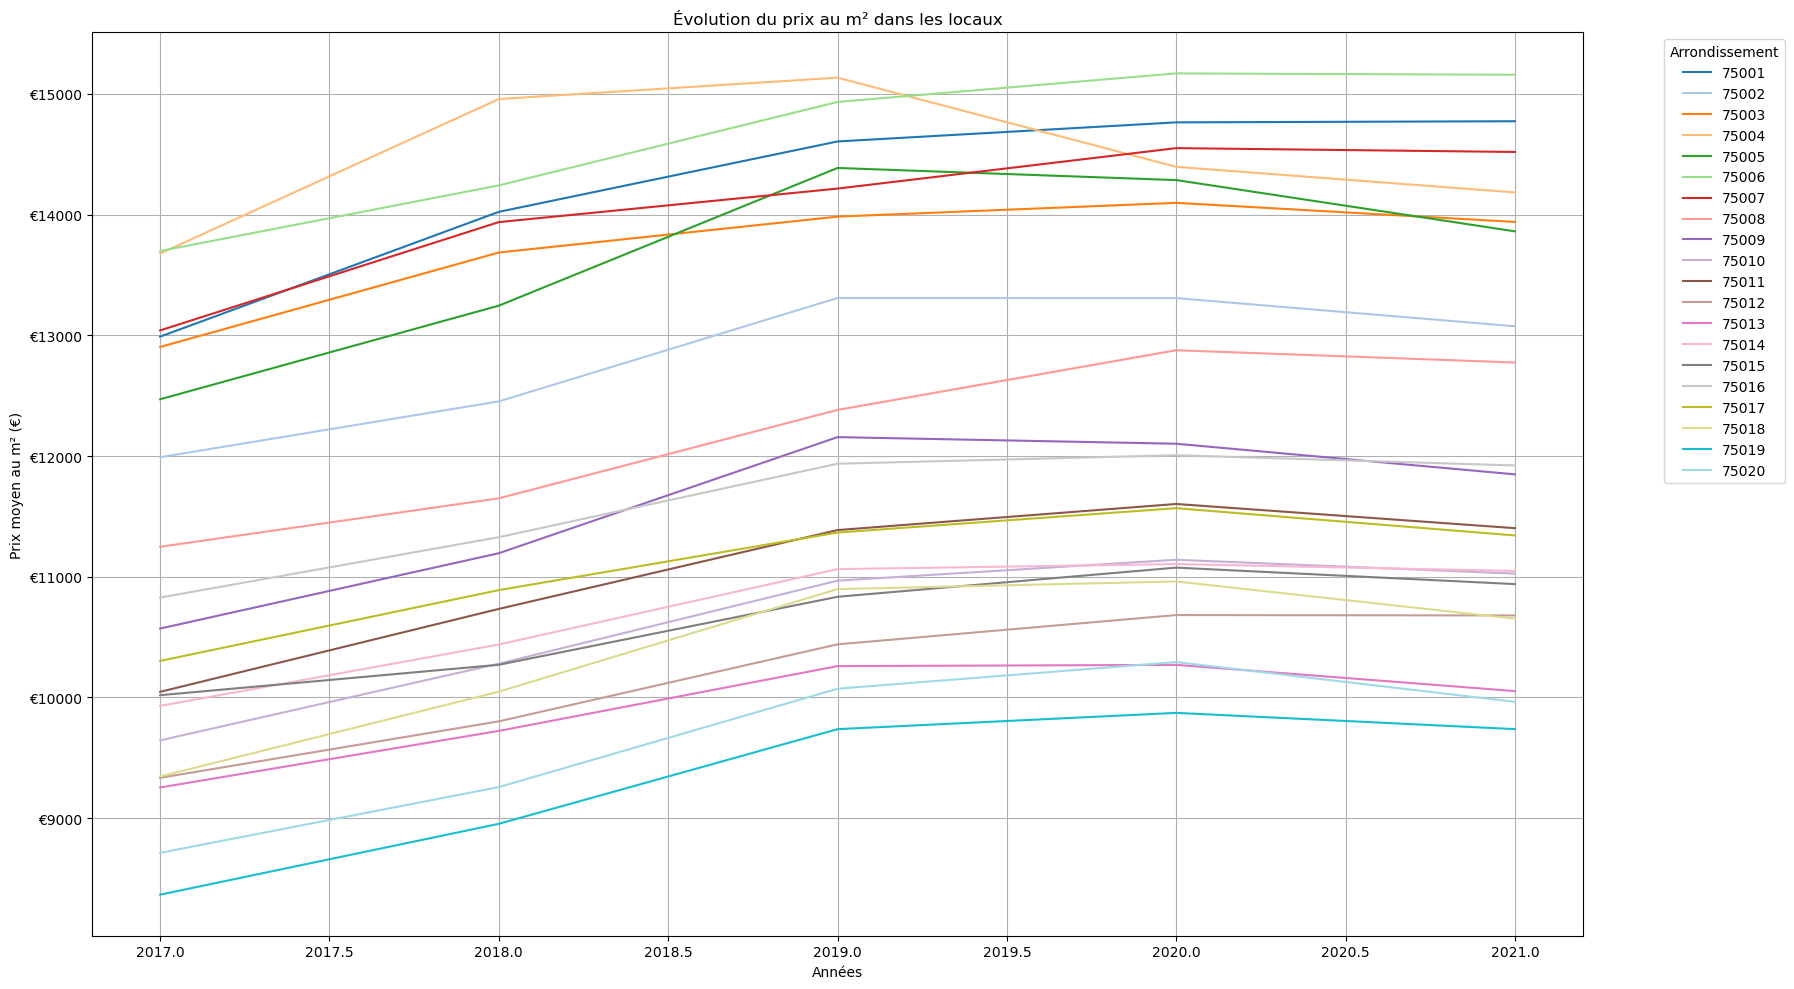

In [511]:
colors = matplotlib.colormaps.get_cmap('tab20').resampled(20)
plt.figure(figsize=(18, 10))


for i, cp in enumerate(range(75001, 75021)):
    data = loccomAvis2[loccomAvis2['code_postal'] == cp]
    if not data.empty:
        plt.plot(data['annee'], data['prix_m2'], label=str(cp), color=colors(i))

plt.xlabel("Années")
plt.ylabel("Prix moyen au m² (€)")
plt.title("Évolution du prix au m² dans les locaux")
plt.grid(True)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('€%d'))
plt.tight_layout()
plt.show()

### On observe que globalement que l'ensemble des transactions a subi une croissance jusqu'a 2020 suivi d'un impact modéré sur les ventes ensuite

### 7. Prix au metre carré par transaction dans un arrondissement

In [514]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

In [515]:
appartement[appartement['code_postal'] == 75006]

date_mutation  valeur_fonciere  code_postal              nom_commune  \
478      2017-01-10     9.601314e+05        75006  Paris 6e Arrondissement   
482      2017-01-13     8.204362e+05        75006  Paris 6e Arrondissement   
484      2017-01-13     1.796112e+06        75006  Paris 6e Arrondissement   
488      2017-01-17     2.488198e+05        75006  Paris 6e Arrondissement   
491      2017-01-19     4.828724e+05        75006  Paris 6e Arrondissement   
...             ...              ...          ...                      ...   
24915    2021-12-22     1.360988e+06        75006  Paris 6e Arrondissement   
24953    2021-12-16     9.705679e+05        75006  Paris 6e Arrondissement   
24956    2021-12-27     2.525194e+05        75006  Paris 6e Arrondissement   
25013    2021-12-24     6.051571e+05        75006  Paris 6e Arrondissement   
25020    2021-12-29     3.850466e+05        75006  Paris 6e Arrondissement   

       code_type_local   type_local  surface_reelle       prix_m2  annee  
478                  2  Appartement              78  12309.376713   2017  
482                  2  Appartement              68  12065.237671   2017  
484                  2  Appartement             143  12560.221783   2017  
488                  2  Appartement              20  12440.991370   2017  
491                  2  Appartement              40  12071.808905   2017  
...                ...          ...             ...           ...    ...  
24915                2  Appartement              97  14030.803835   2021  
24953                2  Appartement              72  13480.109589   2021  
24956                2  Appartement              18  14028.857261   2021  
25013                2  Appartement              44  13753.571507   2021  
25020                2  Appartement              28  13751.663289   2021  

[709 rows x 9 columns]

In [516]:
np.shape(appartement.loc[appartement['code_postal']==75006])

(709, 9)

In [517]:
appartement[appartement['code_postal'] == 75006].max()

date_mutation          2021-12-29 00:00:00
valeur_fonciere                10734783.26
code_postal                          75006
nom_commune        Paris 6e Arrondissement
code_type_local                          2
type_local                     Appartement
surface_reelle                         855
prix_m2                       14169.817124
annee                                 2021
dtype: object

On constate que le prix moyen est plus élevé que dans les autres arrondissements et que celui-ci contient des appartements avec des surfaces bien supérieures a la moyenne.

Affichons l'historique des transactions pour visualiser la dispersion des données :

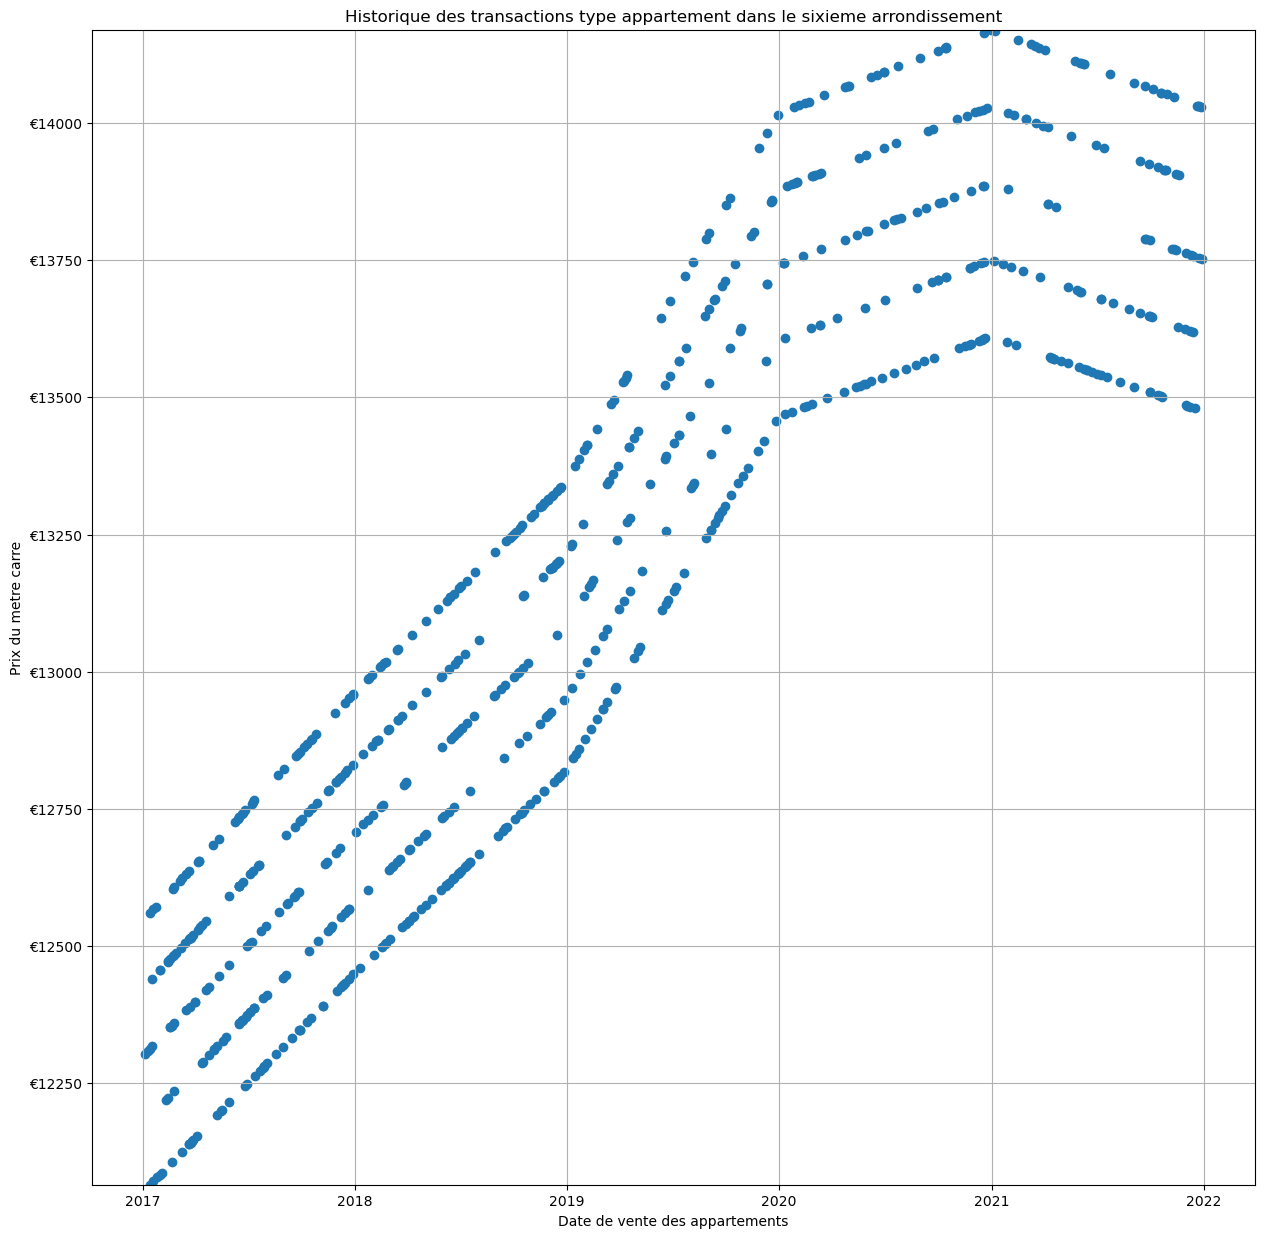

In [519]:
#Insérer ci-dessous le scatter plot
cp=75006
plt.figure(figsize=(15,15))

plt.scatter(appartement.loc[appartement['code_postal']==cp]['date_mutation'],appartement.loc[appartement['code_postal']==cp]['prix_m2'])

plt.xlabel('Date de vente des appartements')
plt.ylabel('Prix du metre carre')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(appartement.loc[appartement['code_postal']==cp]['prix_m2'].min(),appartement.loc[appartement['code_postal']==cp]['prix_m2'].max())

plt.grid(which='both')
plt.title('Historique des transactions type appartement dans le sixieme arrondissement')
plt.show()




### On observe que le prix au m2 a décliné après une croissance constante non pas a partir de 2020 mais de 2021 sur le secteur du 6eme arrondissement.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [523]:
#On calcule la corrélation de Spearman
from scipy import stats
from scipy.stats import spearmanr

In [524]:
stats.pearsonr (appartement.loc[appartement['code_postal']==75006]['date_mutation'].astype('datetime64[s]').astype('int64')/10**9,appartement.loc[appartement['code_postal']==75006]['prix_m2'])

PearsonRResult(statistic=0.9038446031381357, pvalue=7.108379235905991e-263)

In [525]:
print(appartement.columns)

Index(['date_mutation', 'valeur_fonciere', 'code_postal', 'nom_commune',
       'code_type_local', 'type_local', 'surface_reelle', 'prix_m2', 'annee'],
      dtype='object')


In [526]:
coef, p = spearmanr(appartement.loc[appartement['code_postal']==75006]['date_mutation'].astype('datetime64[s]').astype('int64')/10**9,appartement.loc[appartement['code_postal']==75006]['prix_m2'])
print(f"Spearman : {coef:.2f}")
print(f"p-value : {p:.2f}")

Spearman : 0.91
p-value : 0.00


### Le coefficient de corrélation est de 0.9 avec une pvalue inférieure a 0.05 donc nous pouvons confirmer la corrélation entre prix m2 et la date.

### 9. Vérification de la relation entre la valeur fonciere et la surface

### Le coefficient de corrélation est de 1 avec une pvalue de 0. La relation est donc confirmée. (Surface/Valeur foncière)

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

In [531]:
stats.pearsonr(appartement.loc[appartement['code_postal']==75006]['surface_reelle'],appartement.loc[appartement['code_postal']==75006]['valeur_fonciere'])

PearsonRResult(statistic=0.9977572898300513, pvalue=0.0)

In [532]:
### Le coefficient de corrélation est de 0.99 avec une pvalue de 0. il y a une forte correlation (Type Valleur Foncière/Surface).

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [534]:
#On crée un dataset qui ne contient que les locaux commerciaux
commercial = historique[historique['type_local'] == 'Local industriel. commercial ou assimilé']
particuliers  = historique[historique['type_local'] == 'Appartement']

In [535]:
commercial.head(10)

date_mutation  valeur_fonciere  code_postal               nom_commune  \
18     2017-02-01     3.113277e+06        75003   Paris 3e Arrondissement   
29     2017-02-17     1.164375e+06        75003   Paris 3e Arrondissement   
34     2017-02-20     3.802522e+05        75003   Paris 3e Arrondissement   
91     2017-03-09     3.623842e+05        75001  Paris 1er Arrondissement   
109    2017-03-29     3.159072e+05        75003   Paris 3e Arrondissement   
135    2017-04-05     8.566050e+05        75003   Paris 3e Arrondissement   
137    2017-03-17     4.827807e+05        75008   Paris 8e Arrondissement   
141    2017-03-29     1.186868e+06        75003   Paris 3e Arrondissement   
142    2017-04-03     1.994616e+06        75008   Paris 8e Arrondissement   
156    2017-04-11     1.152447e+06        75003   Paris 3e Arrondissement   

     code_type_local                                type_local  \
18                 4  Local industriel. commercial ou assimilé   
29                 4  Local industriel. commercial ou assimilé   
34                 4  Local industriel. commercial ou assimilé   
91                 4  Local industriel. commercial ou assimilé   
109                4  Local industriel. commercial ou assimilé   
135                4  Local industriel. commercial ou assimilé   
137                4  Local industriel. commercial ou assimilé   
141                4  Local industriel. commercial ou assimilé   
142                4  Local industriel. commercial ou assimilé   
156                4  Local industriel. commercial ou assimilé   

     surface_reelle       prix_m2  annee  
18              250  12453.109192   2017  
29               95  12256.581684   2017  
34               31  12266.199603   2017  
91               29  12496.006028   2017  
109              25  12636.289028   2017  
135              67  12785.148561   2017  
137              44  10972.287534   2017  
141              93  12762.023247   2017  
142             185  10781.710276   2017  
156              90  12804.970256   2017

In [536]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
commercial = commercial.groupby('annee')['prix_m2'].mean().reset_index()
commercial

annee       prix_m2
0   2017  10949.909218
1   2018  11569.499180
2   2019  11960.132051
3   2020  11966.470204
4   2021  12006.488691

In [537]:
particuliers = particuliers.groupby('annee')['prix_m2'].mean().reset_index()

In [538]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot (commercial['annee'], commercial['prix_m2'], label='commercial', color='blue')
plt.plot (particuliers['annee'], particuliers['prix_m2'], label='Appartement', color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

###Le prix au metre carré des locaux commerciaux est indépendant de celui des appartements et bien que ayant subi un ralentissement en 2019, la valeur est toujours en croissance légère.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [544]:
historique_encoded = historique.join(pd.get_dummies(historique['code_postal'],dtype = 'int'))
historique_encoded = historique_encoded.join(pd.get_dummies(historique['type_local'],dtype = 'int'))
historique_encoded['timestamp'] = historique_encoded['date_mutation'].astype('datetime64[s]').astype('int64')/10**9 

In [545]:
historique_encoded.drop(['annee','date_mutation','code_postal','code_type_local','type_local','nom_commune','prix_m2'],axis='columns',inplace=True)


In [546]:
historique_encoded.head(5)

valeur_fonciere  surface_reelle  75001  75002  75003  75004  75005  75006  \
0     5.505597e+05              50      0      0      1      0      0      0   
1     1.576492e+06             163      0      0      0      0      0      0   
2     6.577574e+05              66      0      0      0      0      0      0   
3     2.500868e+05              22      0      0      1      0      0      0   
4     1.762667e+05              15      1      0      0      0      0      0   

   75007  75008  ...  75014  75015  75016  75017  75018  75019  75020  \
0      0      0  ...      0      0      0      0      0      0      0   
1      0      1  ...      0      0      0      0      0      0      0   
2      0      1  ...      0      0      0      0      0      0      0   
3      0      0  ...      0      0      0      0      0      0      0   
4      0      0  ...      0      0      0      0      0      0      0   

   Appartement  Local industriel. commercial ou assimilé  timestamp  
0            1                                         0   1.483402  
1            1                                         0   1.484179  
2            1                                         0   1.484006  
3            1                                         0   1.484006  
4            1                                         0   1.484266  

[5 rows x 25 columns]

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [548]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test
# La valeur y à trouver est la valeur foncière

from sklearn.model_selection import train_test_split


X = historique_encoded[['surface_reelle',75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020, 'Appartement','Local industriel. commercial ou assimilé','timestamp']]
y = historique_encoded['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)


In [549]:
#conversion des données en str

#X_train.colummns = X_train.columns.astype(str) 
#X_test.colummns = X_test.columns.astype(str)


In [550]:
X_train.head()

surface_reelle  75001  75002  75003  75004  75005  75006  75007  75008  \
3947               20      0      0      0      0      0      0      0      0   
7657               41      0      0      0      0      0      0      0      0   
25096              70      0      0      0      0      0      0      0      0   
16792              11      0      0      1      0      0      0      0      0   
9600               29      0      0      0      0      0      0      0      0   

       75009  ...  75014  75015  75016  75017  75018  75019  75020  \
3947       0  ...      0      0      0      1      0      0      0   
7657       0  ...      0      0      0      0      0      0      0   
25096      1  ...      0      0      0      0      0      0      0   
16792      0  ...      0      0      0      0      0      0      0   
9600       0  ...      0      0      0      0      1      0      0   

       Appartement  Local industriel. commercial ou assimilé  timestamp  
3947             1                                         0   1.498608  
7657             0                                         1   1.545264  
25096            1                                         0   1.614298  
16792            1                                         0   1.590451  
9600             1                                         0   1.516234  

[5 rows x 24 columns]

In [551]:
X_train.columns = X_train.columns.astype(str) 

In [552]:
X_test.columns = X_test.columns.astype(str) 

In [553]:
X_train.columns

Index(['surface_reelle', '75001', '75002', '75003', '75004', '75005', '75006',
       '75007', '75008', '75009', '75010', '75011', '75012', '75013', '75014',
       '75015', '75016', '75017', '75018', '75019', '75020', 'Appartement',
       'Local industriel. commercial ou assimilé', 'timestamp'],
      dtype='object')

In [554]:
X_test.columns

Index(['surface_reelle', '75001', '75002', '75003', '75004', '75005', '75006',
       '75007', '75008', '75009', '75010', '75011', '75012', '75013', '75014',
       '75015', '75016', '75017', '75018', '75019', '75020', 'Appartement',
       'Local industriel. commercial ou assimilé', 'timestamp'],
      dtype='object')

In [555]:
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)


In [556]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([449142.36374371, 463517.25903292, 328526.06187275, ...,
       567697.8104455 , 304287.77720456, 330648.6540927 ])

In [557]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)*100}")

MAPE: 8.993992258558519


In [558]:
print(y.describe())

count    2.619600e+04
mean     4.916170e+05
std      5.713292e+05
min      8.519470e+04
25%      2.339439e+05
50%      3.545774e+05
75%      5.702197e+05
max      3.843359e+07
Name: valeur_fonciere, dtype: float64


### Notre algorithme fait donc 8.9% d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Retirer les valeurs aberrantes
- Calculer le MAE pour les outliers
- Ajouter en précision (rue, services a proximité etc..)
- Ajouter les variables externes pouvant influencer le prix (COVID etc..)

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = data_encoded["valeur_fonciere"].values
y_pred = data_encoded["valeur_fonciere"].values

mae = mean_absolute_error(y_true, y_pred)
mae

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [563]:
#On importe les données dans un dataframe
portefeuille.head(5)

adresse_numero            adresse_nom_voie  code_postal  code_commune  \
0             127             RUE SAINT-DENIS        75001         75101   
1              62  RUE NOTRE-DAME DE NAZARETH        75003         75103   
2              62              RUE DE TURENNE        75003         75103   
3              32                 AV GEORGE V        75008         75108   
4             152                BD HAUSSMANN        75008         75108   

                nom_commune  surface_carrez  code_type_local   type_local  \
0  Paris 1er Arrondissement           16.41                2  Appartement   
1   Paris 3e Arrondissement           20.47                2  Appartement   
2   Paris 3e Arrondissement           64.48                2  Appartement   
3   Paris 8e Arrondissement           63.29                2  Appartement   
4   Paris 8e Arrondissement           20.58                2  Appartement   

   surface_reelle_bati  nombre_pieces_principales  longitude   latitude  
0                   25                          1   2.349593  48.863227  
1                   22                          1   2.356977  48.867907  
2                   65                          3   2.364855  48.859318  
3                   74                          2   2.301586  48.868893  
4                   22                          1   2.311643  48.875490

In [564]:
portefeuille.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)

In [565]:
portefeuille.head(5)

adresse_numero            adresse_nom_voie  code_postal  code_commune  \
0             127             RUE SAINT-DENIS        75001         75101   
1              62  RUE NOTRE-DAME DE NAZARETH        75003         75103   
2              62              RUE DE TURENNE        75003         75103   
3              32                 AV GEORGE V        75008         75108   
4             152                BD HAUSSMANN        75008         75108   

                nom_commune  surface_carrez  code_type_local   type_local  \
0  Paris 1er Arrondissement           16.41                2  Appartement   
1   Paris 3e Arrondissement           20.47                2  Appartement   
2   Paris 3e Arrondissement           64.48                2  Appartement   
3   Paris 8e Arrondissement           63.29                2  Appartement   
4   Paris 8e Arrondissement           20.58                2  Appartement   

   surface_reelle  nombre_pieces_principales  longitude   latitude  
0              25                          1   2.349593  48.863227  
1              22                          1   2.356977  48.867907  
2              65                          3   2.364855  48.859318  
3              74                          2   2.301586  48.868893  
4              22                          1   2.311643  48.875490

In [566]:
portefeuille.info

<bound method DataFrame.info of      adresse_numero            adresse_nom_voie  code_postal  code_commune  \
0               127             RUE SAINT-DENIS        75001         75101   
1                62  RUE NOTRE-DAME DE NAZARETH        75003         75103   
2                62              RUE DE TURENNE        75003         75103   
3                32                 AV GEORGE V        75008         75108   
4               152                BD HAUSSMANN        75008         75108   
..              ...                         ...          ...           ...   
270              15              AV DE LAUMIERE        75019         75119   
271               3            RUE SAINT-JOSEPH        75002         75102   
272               2                  RUE GRETRY        75002         75102   
273             115               RUE D ABOUKIR        75002         75102   
274              16                 RUE AUBRIOT        75004         75104   

                  nom_commune  

In [567]:
portefeuille_encoded = portefeuille.join(pd.get_dummies(portefeuille['code_postal'],dtype = 'int'))
portefeuille_encoded = portefeuille_encoded.join(pd.get_dummies(portefeuille['type_local'],dtype = 'int'))
portefeuille_encoded['timestamp'] = int(dt.datetime(2022,12,31).timestamp()) / 10**9


In [568]:
portefeuille_encoded.head()

adresse_numero            adresse_nom_voie  code_postal  code_commune  \
0             127             RUE SAINT-DENIS        75001         75101   
1              62  RUE NOTRE-DAME DE NAZARETH        75003         75103   
2              62              RUE DE TURENNE        75003         75103   
3              32                 AV GEORGE V        75008         75108   
4             152                BD HAUSSMANN        75008         75108   

                nom_commune  surface_carrez  code_type_local   type_local  \
0  Paris 1er Arrondissement           16.41                2  Appartement   
1   Paris 3e Arrondissement           20.47                2  Appartement   
2   Paris 3e Arrondissement           64.48                2  Appartement   
3   Paris 8e Arrondissement           63.29                2  Appartement   
4   Paris 8e Arrondissement           20.58                2  Appartement   

   surface_reelle  nombre_pieces_principales  ...  75014  75015  75016  75017  \
0              25                          1  ...      0      0      0      0   
1              22                          1  ...      0      0      0      0   
2              65                          3  ...      0      0      0      0   
3              74                          2  ...      0      0      0      0   
4              22                          1  ...      0      0      0      0   

   75018  75019  75020  Appartement  Local industriel. commercial ou assimilé  \
0      0      0      0            1                                         0   
1      0      0      0            1                                         0   
2      0      0      0            1                                         0   
3      0      0      0            1                                         0   
4      0      0      0            1                                         0   

   timestamp  
0   1.672441  
1   1.672441  
2   1.672441  
3   1.672441  
4   1.672441  

[5 rows x 35 columns]

In [569]:
portefeuille_encoded = portefeuille_encoded.drop(columns=['adresse_numero','code_type_local','code_postal','type_local', 'adresse_nom_voie','code_commune','nom_commune','surface_carrez','nombre_pieces_principales','longitude','latitude'])

In [570]:
portefeuille_encoded.head(5)

surface_reelle  75001  75002  75003  75004  75005  75006  75007  75008  \
0              25      1      0      0      0      0      0      0      0   
1              22      0      0      1      0      0      0      0      0   
2              65      0      0      1      0      0      0      0      0   
3              74      0      0      0      0      0      0      0      1   
4              22      0      0      0      0      0      0      0      1   

   75009  ...  75014  75015  75016  75017  75018  75019  75020  Appartement  \
0      0  ...      0      0      0      0      0      0      0            1   
1      0  ...      0      0      0      0      0      0      0            1   
2      0  ...      0      0      0      0      0      0      0            1   
3      0  ...      0      0      0      0      0      0      0            1   
4      0  ...      0      0      0      0      0      0      0            1   

   Local industriel. commercial ou assimilé  timestamp  
0                                         0   1.672441  
1                                         0   1.672441  
2                                         0   1.672441  
3                                         0   1.672441  
4                                         0   1.672441  

[5 rows x 24 columns]

Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [572]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction

In [573]:
portefeuille_encoded.head(5)

surface_reelle  75001  75002  75003  75004  75005  75006  75007  75008  \
0              25      1      0      0      0      0      0      0      0   
1              22      0      0      1      0      0      0      0      0   
2              65      0      0      1      0      0      0      0      0   
3              74      0      0      0      0      0      0      0      1   
4              22      0      0      0      0      0      0      0      1   

   75009  ...  75014  75015  75016  75017  75018  75019  75020  Appartement  \
0      0  ...      0      0      0      0      0      0      0            1   
1      0  ...      0      0      0      0      0      0      0            1   
2      0  ...      0      0      0      0      0      0      0            1   
3      0  ...      0      0      0      0      0      0      0            1   
4      0  ...      0      0      0      0      0      0      0            1   

   Local industriel. commercial ou assimilé  timestamp  
0                                         0   1.672441  
1                                         0   1.672441  
2                                         0   1.672441  
3                                         0   1.672441  
4                                         0   1.672441  

[5 rows x 24 columns]

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [575]:
portefeuille_encoded.columns = portefeuille_encoded.columns.astype(str) 

In [576]:
portefeuille_encoded.columns

Index(['surface_reelle', '75001', '75002', '75003', '75004', '75005', '75006',
       '75007', '75008', '75009', '75010', '75011', '75012', '75013', '75014',
       '75015', '75016', '75017', '75018', '75019', '75020', 'Appartement',
       'Local industriel. commercial ou assimilé', 'timestamp'],
      dtype='object')

In [577]:
#On effectue la prédiction

valeur_fonciere_predite = reg.predict(portefeuille_encoded)
valeur_fonciere_predite


array([ 438761.08120468,  370919.04045438,  818364.15969748,
        877609.06387009,  336512.64059936,  471786.74641704,
        391730.44134941,  640326.27428156,  149975.7460944 ,
        148020.05996773,  326872.65370214,  210454.26265281,
        484240.76756885,  376945.46981304,  346918.34104687,
       1049146.41085845, 1109723.77222787,  432212.26533128,
        972108.49655631,  378983.57104801,  470596.77384066,
        560233.70414306,  149975.7460944 ,  512219.57563072,
        154256.17237224,  491408.17473569,  805534.87428778,
        784723.47339275,  678926.83841887,  182475.45459094,
        179237.16131027,  432212.26533128,  607826.56578502,
        276126.75861857, 1179374.37684799,  244909.65727603,
        514175.26175739,  220859.96310033,  244909.65727603,
        237656.99027013,  402136.14179692,  345728.36847049,
        383181.58221755,  160381.44654191,  376945.46981304,
        348966.66175117,  234503.95682851,  534986.66265242,
        258313.17684738,

In [578]:
portefeuille['valeur_fonciere_predite'] = valeur_fonciere_predite

In [579]:
portefeuille

adresse_numero            adresse_nom_voie  code_postal  code_commune  \
0               127             RUE SAINT-DENIS        75001         75101   
1                62  RUE NOTRE-DAME DE NAZARETH        75003         75103   
2                62              RUE DE TURENNE        75003         75103   
3                32                 AV GEORGE V        75008         75108   
4               152                BD HAUSSMANN        75008         75108   
..              ...                         ...          ...           ...   
270              15              AV DE LAUMIERE        75019         75119   
271               3            RUE SAINT-JOSEPH        75002         75102   
272               2                  RUE GRETRY        75002         75102   
273             115               RUE D ABOUKIR        75002         75102   
274              16                 RUE AUBRIOT        75004         75104   

                  nom_commune  surface_carrez  code_type_local  \
0    Paris 1er Arrondissement           16.41                2   
1     Paris 3e Arrondissement           20.47                2   
2     Paris 3e Arrondissement           64.48                2   
3     Paris 8e Arrondissement           63.29                2   
4     Paris 8e Arrondissement           20.58                2   
..                        ...             ...              ...   
270  Paris 19e Arrondissement           14.12                4   
271   Paris 2e Arrondissement           14.10                4   
272   Paris 2e Arrondissement           34.85                4   
273   Paris 2e Arrondissement           41.61                4   
274   Paris 4e Arrondissement           20.40                4   

                                   type_local  surface_reelle  \
0                                 Appartement              25   
1                                 Appartement              22   
2                                 Appartement              65   
3                                 Appartement              74   
4                                 Appartement              22   
..                                        ...             ...   
270  Local industriel. commercial ou assimilé              16   
271  Local industriel. commercial ou assimilé              15   
272  Local industriel. commercial ou assimilé              35   
273  Local industriel. commercial ou assimilé              49   
274  Local industriel. commercial ou assimilé              37   

     nombre_pieces_principales  longitude   latitude  valeur_fonciere_predite  
0                            1   2.349593  48.863227            438761.081205  
1                            1   2.356977  48.867907            370919.040454  
2                            3   2.364855  48.859318            818364.159697  
3                            2   2.301586  48.868893            877609.063870  
4                            1   2.311643  48.875490            336512.640599  
..                         ...        ...        ...                      ...  
270                          0   2.380450  48.883397            234142.631632  
271                          0   2.345110  48.868196            352958.562042  
272                          0   2.337593  48.870514            561072.570992  
273                          0   2.349804  48.868784            706752.377257  
274                          0   2.357412  48.858715            663995.814932  

[275 rows x 13 columns]

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [581]:
#On vérifie les 10 premières valeurs
print((valeur_fonciere_predite).astype(int)[:10])

[438761 370919 818364 877609 336512 471786 391730 640326 149975 148020]


In [582]:
#Valorisation du portefeuille sur le segment des particuliers
portefeuille.groupby('type_local')['valeur_fonciere_predite'].sum()/1000000


type_local
Appartement                                 71.221839
Local industriel. commercial ou assimilé    98.599443
Name: valeur_fonciere_predite, dtype: float64

In [583]:
(portefeuille[portefeuille['type_local'] == 'Appartement']['valeur_fonciere_predite'].sum() / 1_000_000)



71.22183947270848

In [584]:

print('La valeur totale des biens des particuliers est de ' + str(portefeuille[portefeuille['type_local'] == 'Appartement']['valeur_fonciere_predite'].sum() / 1_000_000) + ' millions.')

La valeur totale des biens des particuliers est de 71.22183947270848 millions.


In [585]:
#Valorisation du portefeuille sur le segment corporate
(portefeuille[portefeuille['type_local'] == 'Local industriel. commercial ou assimilé']['valeur_fonciere_predite'].sum() / 1_000_000)


98.59944269346313

In [586]:
portefeuille[portefeuille['type_local'] == 'Appartement'].groupby('code_postal')['valeur_fonciere_predite'].sum() / 1_000_000

code_postal
75001     0.438761
75002     3.349322
75003     8.619375
75005     0.364086
75006     0.380494
75007     0.606951
75008     3.756828
75009     4.479383
75010    10.590863
75011     1.933606
75012     2.118218
75014     1.863977
75015     0.647341
75016     1.471386
75017     8.250098
75018     9.846886
75019     5.965707
75020     6.538557
Name: valeur_fonciere_predite, dtype: float64

In [587]:
portefeuille[portefeuille['type_local'] == 'Local industriel. commercial ou assimilé'].groupby('code_postal')['valeur_fonciere_predite'].sum() / 1_000_000

code_postal
75001     2.445176
75002     2.680494
75003     6.681340
75004     0.663996
75005     3.050320
75006     6.408652
75007     1.013612
75008    11.110987
75009     3.138686
75010     4.329641
75011     7.682410
75012     6.438417
75013     4.797309
75014     3.947153
75015     4.815759
75016    10.170314
75017    12.980227
75018     3.754721
75019     1.493261
75020     0.996966
Name: valeur_fonciere_predite, dtype: float64

In [588]:
print('La valeur totale des biens type corporate est de ' + str(portefeuille[portefeuille['type_local'] == 'Local industriel. commercial ou assimilé']['valeur_fonciere_predite'].sum() / 1_000_000) + ' millions.')

La valeur totale des biens type corporate est de 98.59944269346313 millions.


In [589]:
portefeuille.groupby('code_postal')['valeur_fonciere_predite'].sum()/1000000

code_postal
75001     2.883937
75002     6.029817
75003    15.300715
75004     0.663996
75005     3.414406
75006     6.789146
75007     1.620562
75008    14.867815
75009     7.618069
75010    14.920504
75011     9.616016
75012     8.556636
75013     4.797309
75014     5.811130
75015     5.463099
75016    11.641701
75017    21.230324
75018    13.601607
75019     7.458969
75020     7.535523
Name: valeur_fonciere_predite, dtype: float64

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :

- Le prix au m2 du segment corporate sera plus valorisé que celui des particuliers en se basant sur les prédictions et représentera la majorité en terme de valeur.
- Pour le corporate, 11 16 et 17eme sont a prioritiser, le 20eme sera loin devant les autres arrondissements en valeur
- Pour les appartements le 3 10 17 et 18eme sont a prioritiser, le 3eme et 17eme seront loin devant les autres arrondissements en valeur
- En cumulé le 17eme sera en tête, suivi du 3 puis 8 10 16 18eme.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [593]:
#On importe les données dans un dataframe
echantillon = pd.read_csv('echantillon_a_classer2.csv')
echantillon.info

<bound method DataFrame.info of     valeur_fonciere  code_postal               nom_commune  surface_reelle
0       868687.0833        75019  Paris 19e Arrondissement              88
1       452050.7622        75019  Paris 19e Arrondissement              45
2       193088.6536        75019  Paris 19e Arrondissement              21
3       303012.5494        75019  Paris 19e Arrondissement              32
4       149272.2001        75019  Paris 19e Arrondissement              20
5       179676.3045        75019  Paris 19e Arrondissement              18
6       241856.5694        75019  Paris 19e Arrondissement              25
7       462981.7971        75019  Paris 19e Arrondissement              63
8       518819.7262        75019  Paris 19e Arrondissement              53
9       403670.3108        75019  Paris 19e Arrondissement              53
10      374523.4521        75019  Paris 19e Arrondissement              50
11      371204.9680        75019  Paris 19e Arrondissement          

In [594]:
echantillon.head(10)

valeur_fonciere  code_postal               nom_commune  surface_reelle
0      868687.0833        75019  Paris 19e Arrondissement              88
1      452050.7622        75019  Paris 19e Arrondissement              45
2      193088.6536        75019  Paris 19e Arrondissement              21
3      303012.5494        75019  Paris 19e Arrondissement              32
4      149272.2001        75019  Paris 19e Arrondissement              20
5      179676.3045        75019  Paris 19e Arrondissement              18
6      241856.5694        75019  Paris 19e Arrondissement              25
7      462981.7971        75019  Paris 19e Arrondissement              63
8      518819.7262        75019  Paris 19e Arrondissement              53
9      403670.3108        75019  Paris 19e Arrondissement              53

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [596]:
echantillon['prixm2'] = echantillon['valeur_fonciere'] / echantillon['surface_reelle']

In [597]:
echantillon = echantillon.drop(columns=['surface_reelle', 'valeur_fonciere'])

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [599]:
from sklearn.cluster import KMeans

In [600]:
kmeans = KMeans(n_clusters=2, random_state=42)
echantillon['cluster'] = kmeans.fit_predict(echantillon[['prixm2']])
print(kmeans.cluster_centers_)

[[7408.7750295 ]
 [9806.92467433]]


C:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [601]:
# On vérifie les données de la prédiction
# Via Kmeans on identifie 2 clusters distincts


In [602]:
echantillon.head(10)

code_postal               nom_commune        prixm2  cluster
0        75019  Paris 19e Arrondissement   9871.444128        1
1        75019  Paris 19e Arrondissement  10045.572493        1
2        75019  Paris 19e Arrondissement   9194.697790        1
3        75019  Paris 19e Arrondissement   9469.142169        1
4        75019  Paris 19e Arrondissement   7463.610005        0
5        75019  Paris 19e Arrondissement   9982.016917        1
6        75019  Paris 19e Arrondissement   9674.262776        1
7        75019  Paris 19e Arrondissement   7348.917414        0
8        75019  Paris 19e Arrondissement   9789.051438        1
9        75019  Paris 19e Arrondissement   7616.420958        0

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [604]:
echantillon['type_bien'] = echantillon['cluster'].map({
    0: 'Appartement',
    1: 'Local commercial'
})


In [605]:
#On affiche les résultats

In [606]:
echantillon.drop(['cluster'],axis='columns',inplace=True)

In [607]:
echantillon

code_postal               nom_commune        prixm2         type_bien
0         75019  Paris 19e Arrondissement   9871.444128  Local commercial
1         75019  Paris 19e Arrondissement  10045.572493  Local commercial
2         75019  Paris 19e Arrondissement   9194.697790  Local commercial
3         75019  Paris 19e Arrondissement   9469.142169  Local commercial
4         75019  Paris 19e Arrondissement   7463.610005       Appartement
5         75019  Paris 19e Arrondissement   9982.016917  Local commercial
6         75019  Paris 19e Arrondissement   9674.262776  Local commercial
7         75019  Paris 19e Arrondissement   7348.917414       Appartement
8         75019  Paris 19e Arrondissement   9789.051438  Local commercial
9         75019  Paris 19e Arrondissement   7616.420958       Appartement
10        75019  Paris 19e Arrondissement   7490.469042       Appartement
11        75019  Paris 19e Arrondissement   9518.076103  Local commercial
12        75019  Paris 19e Arrondissement   7238.422973       Appartement
13        75019  Paris 19e Arrondissement   9869.462344  Local commercial
14        75019  Paris 19e Arrondissement   7343.539316       Appartement
15        75019  Paris 19e Arrondissement   7313.114383       Appartement
16        75019  Paris 19e Arrondissement   7415.564350       Appartement
17        75019  Paris 19e Arrondissement   9949.544453  Local commercial
18        75019  Paris 19e Arrondissement   9978.784824  Local commercial
19        75019  Paris 19e Arrondissement   7296.900511       Appartement
20        75019  Paris 19e Arrondissement   7322.570549       Appartement
21        75019  Paris 19e Arrondissement   7207.217631       Appartement
22        75019  Paris 19e Arrondissement   9815.972258  Local commercial
23        75019  Paris 19e Arrondissement   7437.880186       Appartement
24        75019  Paris 19e Arrondissement   7399.266029       Appartement
25        75019  Paris 19e Arrondissement   7306.810274       Appartement
26        75019  Paris 19e Arrondissement   9961.146860  Local commercial
27        75019  Paris 19e Arrondissement  10103.161576  Local commercial
28        75019  Paris 19e Arrondissement   9597.631487  Local commercial
29        75019  Paris 19e Arrondissement   7613.514618       Appartement
30        75019  Paris 19e Arrondissement   9734.720494  Local commercial
31        75019  Paris 19e Arrondissement   7666.071700       Appartement
32        75019  Paris 19e Arrondissement  10113.195821  Local commercial
33        75019  Paris 19e Arrondissement   7577.044520       Appartement
34        75019  Paris 19e Arrondissement   7294.202055       Appartement
35        75019  Paris 19e Arrondissement   7239.983240       Appartement
36        75019  Paris 19e Arrondissement   9715.531660  Local commercial
37        75019  Paris 19e Arrondissement   7583.980836       Appartement
38        75019  Paris 19e Arrondissement   9983.591800  Local commercial
39        75019  Paris 19e Arrondissement   9771.486096  Local commercial

In [722]:
(echantillon['type_bien'] == 'Local commercial').sum()

20

In [724]:
(echantillon['type_bien'] == 'Appartement').sum()

20

In [732]:
echantillon.groupby('type_bien')['prixm2'].mean()

type_bien
Appartement         7408.775029
Local commercial    9806.924674
Name: prixm2, dtype: float64

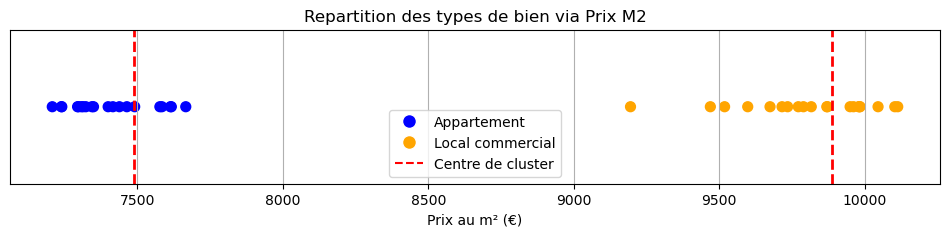

In [716]:
plt.figure(figsize=(12, 2))

couleurs = {'Appartement': 'blue', 'Local commercial': 'orange'}
colors = echantillon['type_bien'].map(couleurs)

plt.scatter(echantillon['prixm2'], [0]*len(echantillon), 
            c=colors, s=50)

centers = [7488.78, 9886.92] 
for center in centers:
    plt.axvline(center, color='red', linestyle='--', linewidth=2)

plt.title("Repartition des types de bien via Prix M2")
plt.xlabel("Prix au m² (€)")
plt.yticks([])  # Axe Y inutile ici
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Appartement', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Local commercial', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], color='red', linestyle='--', label='Centre de cluster')
])
plt.grid(True)
plt.show()

résumé bilan appart/
commercial (comptez le nombre d'appartements et indiquer le prix moyen du m2 des 2 types)(mean)

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- On remarque une nette séparation entre appartements et locaux commerciaux, avec une nombre moins important de locaux commerciaux mais a plus fort valeur au m2.
- Certaines surfaces des appartements sont bien plus élevées que l'ensemble.

- Ce graphique ne peut servir que d'indication générale et n'est pas une mesure precise qui peut être utilisé sur un secteur précis et ne prends pas en compte les différents services disponibles pour une évalution des biens.

dateset principal + appartment +vis1(année)+vis2


viz1=dataset_appartement[['date_mutation','prix_metre_carre']].groupby(dataset_appartement.date_mutation.dt.year).mean()


viz2=dataset_appartement[['date_mutation','prix_metre_carre','code_postal']].groupby([dataset_appartement.date_mutation.dt.year,'code_postal'],as_index=False).mean()

1- dataset_appartement=dataset.drop(columns=['adresse_numero','adresse_nom_voie','code_type_local','nom_commune'])[dataset['code_type_local']==2]